In [ ]:
# Steps involved in the notebook
# 1. Cleaning the tweets(removing all the emojis, special character and lower casing the text)
# 2. Tokenizing the data:
#    1. Word-Vec
#    2. Bert-Tokenization
# 3. Splitting the tweets into labelled and unlabelled data and further splitting them into train, test and split
# 4.  Semi-supervised learning - 
#     1. SVM
#     2. Random Forrest
#     3. XGBoost Classifier
#     3. BERT

#Inporting and Downloading the Libraries

In [1]:
!pip install emoji
!pip  install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 240.9/240.9 KB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=531877e7e9d8da6811231070cec2a650580ff8ba31db6baf624d985c90b8f399
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.8/5.8 MB 83.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.6/7.6 MB 89.0 MB/s eta 0:00:00
     

In [2]:
#general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel

#keras
import tensorflow as tf
from tensorflow import keras
#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<Figure size 432x288 with 0 Axes>

In [3]:
import warnings
warnings.simplefilter('ignore') #we don't wanna see that
np.random.seed(1) #i'm locking seed at the begining since we will use some heavy RNG stuff, be aware

In [4]:
# Modules to display full columns and cells
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [5]:
# To modules to clean up texts
import nltk.data
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
# For Word Embedding
from collections import Counter
import gensim
import gensim.models as g
from gensim.models import Word2Vec
from gensim.models import Phrases

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

In [8]:
# download the model and return as object ready for use
# model_glove_twitter = api.load("glove-twitter-50")

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.metrics import roc_auc_score

# Cleaning the Data

In [10]:
data = pd.read_excel('./oxygen_related_COVID_tweets.xlsx')

In [11]:
data.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                                                                                                  text  \
0                                        @jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.   
1                          @fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up.  #FordfailedOntario   
2                                     @arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.   
3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can‚Äôt??   
4                                                                                                                        @NotHoodlum Or in a wheelchair....with Oxygen   

   label  
0    0.0  
1   -1.0  
2   -1.0  
3    0.0  
4    0.0

In [12]:
# Dropping duplicates tweets
data.drop_duplicates(subset='text',inplace = True)
data.drop(columns=['Unnamed: 0'], inplace = True)

In [13]:
data.head()

text  \
0                                        @jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.   
1                          @fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up.  #FordfailedOntario   
2                                     @arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.   
3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can‚Äôt??   
4                                                                                                                        @NotHoodlum Or in a wheelchair....with Oxygen   

   label  
0    0.0  
1   -1.0  
2   -1.0  
3    0.0  
4    0.0

In [14]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#Clean emojis from text
def strip_emoji(text):
    return re.sub(emoji_pattern, r"", text) #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + '√É'+'¬±'+'√£'+'¬º'+'√¢'+'¬ª'+'¬ß'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [15]:
texts_new = []
for t in data.text:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(str(t)))))))

In [16]:
data['text_clean'] = texts_new

In [17]:
data.head()

text  \
0                                        @jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.   
1                          @fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up.  #FordfailedOntario   
2                                     @arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.   
3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can‚Äôt??   
4                                                                                                                        @NotHoodlum Or in a wheelchair....with Oxygen   

   label  \
0    0.0   
1   -1.0   
2   -1.0   
3    0.0   
4    0.0   

                                                                                                              text_clean  
0                       how about the vaccines ventilators at least president trump was able to get a stimulus check out  
1  imagine the most populous province wasnt all cylindersgreat now we know youre going to fuck this up fordfailedontario  
2           ye bhi nhi pta hota ki iopec countries ka loan kitna h cylinder kitne din me aayega ye sab bhi questions the  
3                                        yeahno oxygen can get through your mask right what makes you think a virus cant  
4                                                                                          or in a wheelchairwith oxygen

In [18]:
text_len = []
for text in data.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [19]:
data['text_len'] = text_len

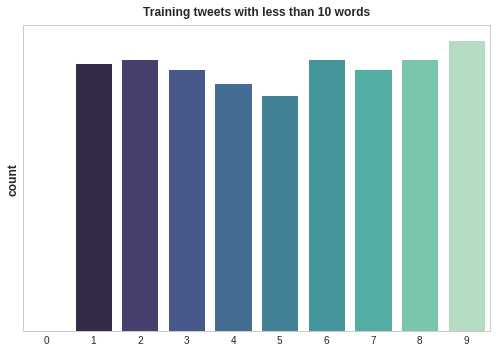

In [20]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=data[data['text_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
# ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

#Tokenization

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
type(list(data.text_clean))

list

In [23]:
data['tokenized_tweets'] = data['text_clean'].apply(lambda x: x.split()) 

In [24]:
from nltk.corpus import stopwords
filtered_words = []
for t in list(data.tokenized_tweets) :
  k = [words for words in t if not words.lower() in set(stopwords.words('english'))]
  filtered_words.append(k)
data['filtered_tweets'] = filtered_words

In [25]:
data.head()

text  \
0                                        @jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.   
1                          @fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up.  #FordfailedOntario   
2                                     @arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.   
3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can‚Äôt??   
4                                                                                                                        @NotHoodlum Or in a wheelchair....with Oxygen   

   label  \
0    0.0   
1   -1.0   
2   -1.0   
3    0.0   
4    0.0   

                                                                                                              text_clean  \
0                       how about the vaccines ventilators at least president trump was able to get a stimulus check out   
1  imagine the most populous province wasnt all cylindersgreat now we know youre going to fuck this up fordfailedontario   
2           ye bhi nhi pta hota ki iopec countries ka loan kitna h cylinder kitne din me aayega ye sab bhi questions the   
3                                        yeahno oxygen can get through your mask right what makes you think a virus cant   
4                                                                                          or in a wheelchairwith oxygen   

   text_len  \
0        17   
1        18   
2        22   
3        15   
4         5   

                                                                                                                           tokenized_tweets  \
0                        [how, about, the, vaccines, ventilators, at, least, president, trump, was, able, to, get, a, stimulus, check, out]   
1  [imagine, the, most, populous, province, wasnt, all, cylindersgreat, now, we, know, youre, going, to, fuck, this, up, fordfailedontario]   
2       [ye, bhi, nhi, pta, hota, ki, iopec, countries, ka, loan, kitna, h, cylinder, kitne, din, me, aayega, ye, sab, bhi, questions, the]   
3                                           [yeahno, oxygen, can, get, through, your, mask, right, what, makes, you, think, a, virus, cant]   
4                                                                                                       [or, in, a, wheelchairwith, oxygen]   

                                                                                                              filtered_tweets  
0                                                [vaccines, ventilators, least, president, trump, able, get, stimulus, check]  
1                           [imagine, populous, province, wasnt, cylindersgreat, know, youre, going, fuck, fordfailedontario]  
2  [ye, bhi, nhi, pta, hota, ki, iopec, countries, ka, loan, kitna, h, cylinder, kitne, din, aayega, ye, sab, bhi, questions]  
3                                                               [yeahno, oxygen, get, mask, right, makes, think, virus, cant]  
4                                                                                                    [wheelchairwith, oxygen]

In [26]:
data.to_csv('data3.csv')

In [27]:
# data = pd.read_csv('/content/data3.csv')

In [28]:
data['filtered_tweets2'] = data['filtered_tweets'].apply(lambda x: ' '.join(x))

In [29]:
data.head()

text  \
0                                        @jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.   
1                          @fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up.  #FordfailedOntario   
2                                     @arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.   
3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can‚Äôt??   
4                                                                                                                        @NotHoodlum Or in a wheelchair....with Oxygen   

   label  \
0    0.0   
1   -1.0   
2   -1.0   
3    0.0   
4    0.0   

                                                                                                              text_clean  \
0                       how about the vaccines ventilators at least president trump was able to get a stimulus check out   
1  imagine the most populous province wasnt all cylindersgreat now we know youre going to fuck this up fordfailedontario   
2           ye bhi nhi pta hota ki iopec countries ka loan kitna h cylinder kitne din me aayega ye sab bhi questions the   
3                                        yeahno oxygen can get through your mask right what makes you think a virus cant   
4                                                                                          or in a wheelchairwith oxygen   

   text_len  \
0        17   
1        18   
2        22   
3        15   
4         5   

                                                                                                                           tokenized_tweets  \
0                        [how, about, the, vaccines, ventilators, at, least, president, trump, was, able, to, get, a, stimulus, check, out]   
1  [imagine, the, most, populous, province, wasnt, all, cylindersgreat, now, we, know, youre, going, to, fuck, this, up, fordfailedontario]   
2       [ye, bhi, nhi, pta, hota, ki, iopec, countries, ka, loan, kitna, h, cylinder, kitne, din, me, aayega, ye, sab, bhi, questions, the]   
3                                           [yeahno, oxygen, can, get, through, your, mask, right, what, makes, you, think, a, virus, cant]   
4                                                                                                       [or, in, a, wheelchairwith, oxygen]   

                                                                                                              filtered_tweets  \
0                                                [vaccines, ventilators, least, president, trump, able, get, stimulus, check]   
1                           [imagine, populous, province, wasnt, cylindersgreat, know, youre, going, fuck, fordfailedontario]   
2  [ye, bhi, nhi, pta, hota, ki, iopec, countries, ka, loan, kitna, h, cylinder, kitne, din, aayega, ye, sab, bhi, questions]   
3                                                               [yeahno, oxygen, get, mask, right, makes, think, virus, cant]   
4                                                                                                    [wheelchairwith, oxygen]   

                                                                                        filtered_tweets2  
0                                     vaccines ventilators least president trump able get stimulus check  
1                 imagine populous province wasnt cylindersgreat know youre going fuck fordfailedontario  
2  ye bhi nhi pta hota ki iopec countries ka loan kitna h cylinder kitne din aayega ye sab bhi questions  
3                                                    yeahno oxygen get mask right makes think virus cant  
4                                                            

In [30]:
# Downloading stopwords
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
# Initializing WordnetLemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [34]:
lemmatized_tweets = []
for w in data.filtered_tweets:
  k = [lemmatizer.lemmatize(t) for t in w]
  lemmatized_tweets.append(k)
data['lemmatized_tweets'] = lemmatized_tweets
data['lemmatized_tweets2'] = data['lemmatized_tweets'].apply(lambda x: " ".join(x))

In [35]:
data.head()

text  \
0                                        @jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.   
1                          @fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up.  #FordfailedOntario   
2                                     @arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.   
3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can‚Äôt??   
4                                                                                                                        @NotHoodlum Or in a wheelchair....with Oxygen   

   label  \
0    0.0   
1   -1.0   
2   -1.0   
3    0.0   
4    0.0   

                                                                                                              text_clean  \
0                       how about the vaccines ventilators at least president trump was able to get a stimulus check out   
1  imagine the most populous province wasnt all cylindersgreat now we know youre going to fuck this up fordfailedontario   
2           ye bhi nhi pta hota ki iopec countries ka loan kitna h cylinder kitne din me aayega ye sab bhi questions the   
3                                        yeahno oxygen can get through your mask right what makes you think a virus cant   
4                                                                                          or in a wheelchairwith oxygen   

   text_len  \
0        17   
1        18   
2        22   
3        15   
4         5   

                                                                                                                           tokenized_tweets  \
0                        [how, about, the, vaccines, ventilators, at, least, president, trump, was, able, to, get, a, stimulus, check, out]   
1  [imagine, the, most, populous, province, wasnt, all, cylindersgreat, now, we, know, youre, going, to, fuck, this, up, fordfailedontario]   
2       [ye, bhi, nhi, pta, hota, ki, iopec, countries, ka, loan, kitna, h, cylinder, kitne, din, me, aayega, ye, sab, bhi, questions, the]   
3                                           [yeahno, oxygen, can, get, through, your, mask, right, what, makes, you, think, a, virus, cant]   
4                                                                                                       [or, in, a, wheelchairwith, oxygen]   

                                                                                                              filtered_tweets  \
0                                                [vaccines, ventilators, least, president, trump, able, get, stimulus, check]   
1                           [imagine, populous, province, wasnt, cylindersgreat, know, youre, going, fuck, fordfailedontario]   
2  [ye, bhi, nhi, pta, hota, ki, iopec, countries, ka, loan, kitna, h, cylinder, kitne, din, aayega, ye, sab, bhi, questions]   
3                                                               [yeahno, oxygen, get, mask, right, makes, think, virus, cant]   
4                                                                                                    [wheelchairwith, oxygen]   

                                                                                        filtered_tweets2  \
0                                     vaccines ventilators least president trump able get stimulus check   
1                 imagine populous province wasnt cylindersgreat know youre going fuck fordfailedontario   
2  ye bhi nhi pta hota ki iopec countries ka loan kitna h cylinder kitne din aayega ye sab bhi questions   
3                                                    yeahno oxygen get mask right makes think virus cant   
4                                                       

In [36]:
data.to_csv('data4.csv')

In [37]:
# data = pd.read_csv('data4.csv')

In [38]:
# Columns name
data.columns

Index(['text', 'label', 'text_clean', 'text_len', 'tokenized_tweets',
       'filtered_tweets', 'filtered_tweets2', 'lemmatized_tweets',
       'lemmatized_tweets2'],
      dtype='object')

##Word-Vec

In [39]:
data.head()

text  \
0                                        @jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.   
1                          @fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up.  #FordfailedOntario   
2                                     @arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.   
3  @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can‚Äôt??   
4                                                                                                                        @NotHoodlum Or in a wheelchair....with Oxygen   

   label  \
0    0.0   
1   -1.0   
2   -1.0   
3    0.0   
4    0.0   

                                                                                                              text_clean  \
0                       how about the vaccines ventilators at least president trump was able to get a stimulus check out   
1  imagine the most populous province wasnt all cylindersgreat now we know youre going to fuck this up fordfailedontario   
2           ye bhi nhi pta hota ki iopec countries ka loan kitna h cylinder kitne din me aayega ye sab bhi questions the   
3                                        yeahno oxygen can get through your mask right what makes you think a virus cant   
4                                                                                          or in a wheelchairwith oxygen   

   text_len  \
0        17   
1        18   
2        22   
3        15   
4         5   

                                                                                                                           tokenized_tweets  \
0                        [how, about, the, vaccines, ventilators, at, least, president, trump, was, able, to, get, a, stimulus, check, out]   
1  [imagine, the, most, populous, province, wasnt, all, cylindersgreat, now, we, know, youre, going, to, fuck, this, up, fordfailedontario]   
2       [ye, bhi, nhi, pta, hota, ki, iopec, countries, ka, loan, kitna, h, cylinder, kitne, din, me, aayega, ye, sab, bhi, questions, the]   
3                                           [yeahno, oxygen, can, get, through, your, mask, right, what, makes, you, think, a, virus, cant]   
4                                                                                                       [or, in, a, wheelchairwith, oxygen]   

                                                                                                              filtered_tweets  \
0                                                [vaccines, ventilators, least, president, trump, able, get, stimulus, check]   
1                           [imagine, populous, province, wasnt, cylindersgreat, know, youre, going, fuck, fordfailedontario]   
2  [ye, bhi, nhi, pta, hota, ki, iopec, countries, ka, loan, kitna, h, cylinder, kitne, din, aayega, ye, sab, bhi, questions]   
3                                                               [yeahno, oxygen, get, mask, right, makes, think, virus, cant]   
4                                                                                                    [wheelchairwith, oxygen]   

                                                                                        filtered_tweets2  \
0                                     vaccines ventilators least president trump able get stimulus check   
1                 imagine populous province wasnt cylindersgreat know youre going fuck fordfailedontario   
2  ye bhi nhi pta hota ki iopec countries ka loan kitna h cylinder kitne din aayega ye sab bhi questions   
3                                                    yeahno oxygen get mask right makes think virus cant   
4                                                       

In [40]:
# making column containing tweets where number are removed
not_int = []
for cell in data.lemmatized_tweets:
  t = [w for w in cell if not w.isdigit() ]
  not_int.append(t)
data['not_integer'] = not_int 

In [41]:
tokenized_tweet = data['lemmatized_tweets'].copy()

In [42]:
# Making the wordvec model
model_w2v = gensim.models.Word2Vec(tokenized_tweet, size=200,window = 5,min_count = 2, sg= 1,hs = 0, negative = 10, workers =8, seed =34)
model_w2v.train(tokenized_tweet,total_examples = len(data['lemmatized_tweets']),epochs=20)
# model_w2v = api.load('/content/model1')

(17423727, 20695520)

In [43]:
model_w2v.save('model1')

In [44]:
# function for converting the tweets into wordvec tokens
def word_vector(tokens, size,i):
  vec = np.zeros(size).reshape((1,size))
  count = 0 
  for word in tokens:
    try:
      vec += model_w2v[word].reshape((1,size))
      count += 1
    except KeyError :
      # print('whatsupp')
      # print(i,tokens)
      continue
      # pass
  if count != 0:
    vec /= count
    return vec

In [45]:
range(len(tokenized_tweet))

range(0, 74355)

In [46]:
# DataFrame containg the wordvec tokens of twweets
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
count1 = 0
for i in range(len(tokenized_tweet)) :
  try :
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200,i)
    wordvec_df = pd.DataFrame(wordvec_arrays)
  except KeyError :
    # print(i,'KeyError')
    count1+=1
    continue
print(count1)  
wordvec_df.shape

2705


(74355, 200)

In [47]:
data.shape

(74355, 10)

In [48]:
# All words are converted into the word vectors
wordvec_df

0         1         2         3         4         5         6    \
0     -0.098515  0.063308 -0.328059  0.571026 -0.033459  0.187666  0.021455   
1     -0.106894  0.302962 -0.406337  0.453237 -0.071846  0.023083  0.030679   
2     -0.554442 -0.062502 -0.248048  0.213513  0.019734 -0.251659  0.087858   
3     -0.104037  0.156650 -0.442679  0.374929  0.074501  0.100543 -0.162171   
4     -0.289818 -0.001508 -0.407684  0.129144  0.113669  0.201384 -0.080222   
...         ...       ...       ...       ...       ...       ...       ...   
74350 -0.416637  0.056150 -0.314064  0.193323  0.047178 -0.191129  0.068314   
74351 -0.015362  0.057896 -0.369639  0.162751 -0.012009  0.314489  0.125510   
74352 -0.104115  0.035918 -0.236814  0.352003  0.137529  0.127996  0.030699   
74353 -0.515818  0.061909 -0.271043  0.195075  0.048936 -0.122376 -0.010459   
74354 -0.181568  0.147624 -0.188094  0.404225  0.055037 -0.062571  0.039137   

            7         8         9         10        11        12        13   \
0      0.087152 -0.238164  0.180368 -0.018608 -0.002665 -0.282139 -0.112194   
1      0.131461 -0.265834  0.173849 -0.054426  0.105727 -0.142327  0.216217   
2     -0.042101 -0.199509  0.072802 -0.266057 -0.252374 -0.213104  0.010561   
3     -0.047874 -0.132272  0.059295 -0.084417 -0.012509 -0.410180 -0.103348   
4     -0.224662 -0.013832  0.291513 -0.118605 -0.363934 -0.173972 -0.306624   
...         ...       ...       ...       ...       ...       ...       ...   
74350  0.003516 -0.119324  0.255063 -0.305405 -0.184823 -0.196912  0.087155   
74351  0.128548 -0.215643  0.347352  0.051725 -0.104311 -0.099755 -0.184765   
74352 -0.084619 -0.217434  0.149291  0.113982 -0.159249 -0.084559 -0.039156   
74353 -0.096563 -0.325603  0.180420 -0.370548 -0.247349 -0.258783  0.111881   
74354  0.065712 -0.298240  0.192381  0.104143 -0.063848 -0.210134 -0.241038   

            14        15        16        17        18        19        20   \
0     -0.183995 -0.076674  0.042755 -0.143772 -0.001198 -0.078169 -0.098653   
1     -0.106679  0.026509  0.317434 -0.126483  0.072257 -0.155219 -0.009903   
2     -0.299152 -0.189312  0.092331  0.083608 -0.030820 -0.188296 -0.136741   
3     -0.170435  0.182703  0.190620 -0.290343  0.043413 -0.075213 -0.023987   
4     -0.103068 -0.309501  0.189049  0.033658  0.047625 -0.271721 -0.117933   
...         ...       ...       ...       ...       ...       ...       ...   
74350 -0.413884 -0.175589  0.100128  0.030987 -0.058250 -0.277365 -0.126177   
74351 -0.037844 -0.033007  0.272256 -0.026332 -0.086123  0.045511  0.249442   
74352 -0.057289 -0.043559  0.149019 -0.026923 -0.068348 -0.135028 -0.050818   
74353 -0.372685 -0.156322  0.032073  0.053320 -0.006496 -0.305355 -0.116902   
74354 -0.151253 -0.031065  0.167590 -0.075626  0.110640 -0.260130 -0.072338   

            21        22        23        24        25        26        27   \
0     -0.172908  0.038607  0.285406  0.071050  0.092312  0.054673  0.308156   
1     -0.176760  0.113388 -0.036024 -0.156075  0.417255 -0.215252  0.128305   
2      0.146636 -0.184950  0.067674  0.022912  0.138314  0.042449 -0.053133   
3     -0.156968 -0.058153  0.094493 -0.164071  0.093331 -0.077633 -0.093368   
4     -0.045572 -0.204348  0.025120  0.286018  0.369690  0.074849 -0.056458   
...         ...       ...       ...       ...       ...       ...       ...   
74350 -0.015500  0.078850  0.140920  0.128363  0.106365 -0.165932 -0.073673   
74351 -0.248681 -0.044461 -0.004199  0.086138  0.478748 -0.158618 -0.066144   
74352  0.073457  0.075574  0.010443  0.105455  0.088142 -0.190681 -0.064669   
74353  0.071322 -0.124563 -0.000816  0.102754  0.211762  0.061086 -0.113529   
74354 -0.047637  0.262617  0.142478  0.042759  0.184623 -0.117430 -0.021056   

            28        29        30        31        32        33        34   \
0      0.059504 -0.345924  0.041939 -0.140317  0.134299  0.104310  0.015366   
1      0.285865 -0.052229  0.087195 -0.026435  0.071750  0

##Bert-Tokenization

In [49]:
# Downloading the Bert pretrained models
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
token_lens = []

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [50]:
# Taking the lenght of the tokenized tweets
for txt in data['lemmatized_tweets2'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

In [51]:
max_len

126

In [52]:
data['token_lens'] = token_lens

In [53]:
data['label'].value_counts()

 0.0    152
-1.0     99
 1.0     63
Name: label, dtype: int64

In [54]:
X = wordvec_df.copy()
y = data['label'].copy().fillna(5)

In [55]:
y.isnull().sum()

0

In [56]:
X.shape

(74355, 200)

In [57]:
y.shape

(74355,)

In [58]:
X['target'] = y.copy()

In [59]:
X['target'].value_counts()

 5.0    71336
 0.0      152
-1.0       99
 1.0       63
Name: target, dtype: int64

In [60]:
X['target'].isnull().sum()

2705

In [61]:
X.loc[X['target'].isnull(),:]

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
76     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
471    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
479    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
695    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
702    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
73842  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
73889  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
73951  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
74107  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
74286  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
76     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
471    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
479    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
695    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
702    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
73842  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
73889  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
73951  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
74107  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
74286  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
76     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
471    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
479    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
695    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
702    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
73842  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
73889  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
73951  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
74107  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
74286  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
76     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
471    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
479    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
695    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
702    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
73842  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
73889  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
73951  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
74107  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
74286  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
76     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
471    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [62]:
X = X.loc[X['target'].notnull(),:].copy()

In [63]:
X = X.loc[X[1].notnull(),:].copy()

In [64]:
y = X['target'].copy()

In [65]:
X.drop(columns=['target'],inplace = True)

In [66]:
X.shape

(71545, 200)

#Splitting the data

In [67]:
X['target'] = y.copy()

In [68]:
X['target'].isnull().sum()

0

In [69]:
X_train = X.loc[X['target']!=5,:]
X_test = X.loc[X['target']==5,:]

In [70]:
X_train.shape,X_test.shape

((314, 201), (71231, 201))

In [71]:
y_train = X_train['target']
y_test = X_test['target']

In [72]:
X_train.drop(columns=['target'],inplace=True)
X_test.drop(columns=['target'],inplace=True)

#Semi- Supervised Models

##SVM

In [87]:
from sklearn.svm import SVC
svm = SVC()
X_train,X_valid,y_train,y_valid1 = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)
svm.fit( X_train, y_train)
pred2 = svm.predict(X_test)
pred2 = pd.DataFrame(pred2)
final_data_y = [y_train, pred2]
final_data_x = [X_train, X_test]
final_data_y = pd.concat(final_data_y)
final_data_x = pd.concat(final_data_x)
svm.fit(final_data_x, final_data_y)
final_pred_1 = svm.predict(X_train)
print('Validation Score is ', accuracy_score(y_valid1, pd.DataFrame(svm.predict(X_valid))))
print('Accuracy Score on labelled data ', accuracy_score(y_train, final_pred_1))

Validation Score is  0.8227848101265823
Accuracy Score on labelled data  0.8808510638297873


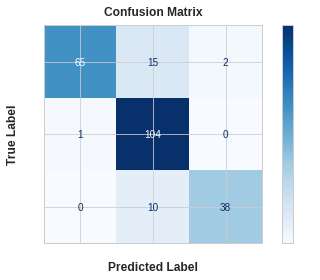

In [88]:
# Confusion Matrix on SVM
from sklearn.metrics import plot_confusion_matrix
sns.reset_orig 
color = 'white'
matrix = plot_confusion_matrix(svm, X_train, y_train, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

##Random Forest

In [89]:
# Importing the RandomForest Classifier model and traing the labelled data then joining both labelled and unlabbeled data to train the model on large data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
X_train,X_valid,y_train,y_valid = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
pred = pd.DataFrame(pred)
X_t = pd.concat([X_train,X_test])
Y_t = pd.concat([y_train,pred])
classifier.fit(X_t,Y_t)
# accuracy score on validation set
print('Accuracy Score of validation Set ', accuracy_score(y_valid, pd.DataFrame(classifier.predict(X_valid))))
# prediction on labelled data
final_pred = classifier.predict(X_train)
# seeing the score on labelled data
score = accuracy_score(y_train,final_pred)
print('Score on labelled data',score)

Accuracy Score of validation Set  0.7457627118644068
Score on labelled data 1.0


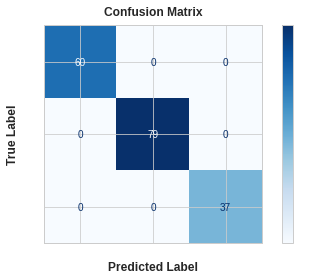

In [90]:
# Confusion Matrix on random Forrest
from sklearn.metrics import plot_confusion_matrix
sns.reset_orig 
color = 'white'
matrix = plot_confusion_matrix(classifier, X_train, y_train, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

##XGBOOST

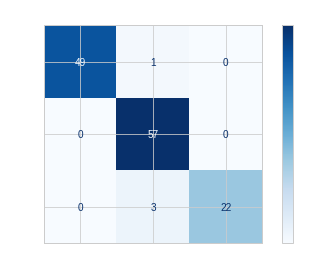

In [91]:
from xgboost import XGBClassifier
X_train,X_valid,y_train,y_valid = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)
xgbclassifier = XGBClassifier()
xgbclassifier.fit( X_train, y_train)
xgb_pred = xgbclassifier.predict(X_test)
xgb_pred = pd.DataFrame(xgb_pred)
frames1 = [X_train, X_test]
labels1 = [y_train, xgb_pred]
X_tweets = pd.concat(frames1)
Y_tweets = pd.concat(labels1)
xgbclassifier.fit( X_tweets,Y_tweets)
xgb_pred_final = xgbclassifier.predict(X_train)
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(xgbclassifier, X_train, y_train, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [92]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, xgb_pred_final)

In [93]:
valid_score = accuracy_score(y_valid, pd.DataFrame(xgbclassifier.predict(X_valid)))
print('accuracy score on valid set ', valid_score)

accuracy score on valid set  0.6818181818181818


In [94]:
print('accuracy score on labelleda data', score)

accuracy score on labelleda data 0.9696969696969697


##BERT

In [95]:
MAX_LEN=126

In [96]:
# Function to tokenize the tweets into bert tokens
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [97]:
data

text  \
0                                                                                                                                                                 @jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.   
1                                                                                                                                                   @fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up.  #FordfailedOntario   
2                                                                                                                                                              @arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.   
3                                                                                                                           @CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can‚Äôt??   
4                                                                                                                                                                                                                                                 @NotHoodlum Or in a wheelchair....with Oxygen   
...                                                                                                                                                                                                                                                                                         ...   
79601                                                                                                                                                          #SonuSood to import Oxygen Plant From France country to India to help COVID-19 Patients!  @SonuSood üôèüèªüáÆüá≥ https://t.co/cAdupbJb8o   
79602                                                                                                                                                            Andhra Pradesh: 11 patients die as oxygen pressure drops in govt hospital in Tirupati  https://t.co/RcnA9f1Wek via @indiatoday   
79603                                                       @dr_maheshsharma SOS!! Need help with oxygen bed at Kailash sec 27. Father also recovering from covid is retired govt officer from cabinet secretariat, resident of sec 20 and your supporter. Any help will be highly appreciated.   
79606  ‚ÄúWe were not prepared for the second wave. We didn‚Äôt develop our infrastructure in terms of ICUs or oxygen generation plants or other health care resources.‚Äù I'm quoted in this article by The American Science Magazine Undark. #Oxygen @undarkmag @RuchiKumar https://t.co/Rzpqhs1pIS   
79705                                              2/2. 7.Service Needed: Continuous Oxygen adminstration 8.Covid Test Done / not done: yes - positive result 9.Attendant Mobile number: 8885519278/9740904423 10.Relation to the Patient: Son Blood Group: B +ve #CovidHelpHyderabad #CovidHyd   

       label  \
0        0.0   
1       -1.0   
2       -1.0   
3        0.0   
4        0.0   
...      ...   
79601    NaN   
79602    NaN   
79603    NaN   
79606    NaN   
79705    NaN   

                                                                                                                                                                                                                              text_clean  \
0                                                                                                                                       how about the vaccines ventilators at least president trump was able to get a stimulus check out   
1                                                                                                        

In [98]:
# Deviding the data into train and test set
X_train1 = data[data['label'].notnull()].copy()
X_test1 = data[data['label'].isnull()].copy()
y_train1 = X_train1['label'].copy()

In [99]:
# Seeing the shape
y_train1.shape

(314,)

In [100]:
# Seeing the differnt types of labelled data
y_train1.value_counts()

 0.0    152
-1.0     99
 1.0     63
Name: label, dtype: int64

In [101]:
X_train1 = X_train1['lemmatized_tweets2'].copy().values
X_test1 = X_test1['lemmatized_tweets2'].copy().values
y_train1 = y_train1.values

In [102]:
X_train1,X_valid1,y_train1,y_valid1 = train_test_split(X_train1, y_train1, test_size=0.25, shuffle=True)

In [103]:
y_train_le = y_train1.copy()
y_valid_le = y_valid1.copy()

In [104]:
# one hot encoding the y data
ohe = preprocessing.OneHotEncoder()
y_train1 = ohe.fit_transform(np.array(y_train1).reshape(-1, 1)).toarray()
y_valid1 = ohe.fit_transform(np.array(y_valid1).reshape(-1, 1)).toarray()

In [105]:
# Tokenizing the train test and validation data
train_input_ids, train_attention_masks = tokenize(X_train1, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid1, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test1, MAX_LEN)

In [106]:
# Splitting the data which has to be predicted due to its too large volume
test = np.array_split(X_test1, 4)

In [107]:
# tokenizing the test data
test_input_ids0, test_attention_masks0 = tokenize(test[0], MAX_LEN)
test_input_ids1, test_attention_masks1 = tokenize(test[1], MAX_LEN)
test_input_ids2, test_attention_masks2 = tokenize(test[2], MAX_LEN)
test_input_ids3, test_attention_masks3 = tokenize(test[3], MAX_LEN)

In [108]:
# Downloading the bert model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [109]:
# Function to create the bert model

def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model


In [110]:
# Model summary
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 126)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 126)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 126,                                           

In [ ]:
# Fitting the model
history_bert = model.fit([train_input_ids,train_attention_masks], y_train1, validation_data=([val_input_ids,val_attention_masks], y_valid1), epochs=4, batch_size=32)

Epoch 1/4
8/8 [==============================] - 373s 44s/step - loss: 1.2064 - categorical_accuracy: 0.2894 - val_loss: 1.1385 - val_categorical_accuracy: 0.2152
Epoch 2/4
8/8 [==============================] - 338s 42s/step - loss: 1.0731 - categorical_accuracy: 0.3745 - val_loss: 1.0428 - val_categorical_accuracy: 0.4810
Epoch 3/4
8/8 [==============================] - 337s 42s/step - loss: 1.0390 - categorical_accuracy: 0.4426 - val_loss: 0.9974 - val_categorical_accuracy: 0.5443
Epoch 4/4


In [127]:
# Predicting the first part out of four of the test data
result_bert0 = model.predict([test_input_ids0,test_attention_masks0])

579/579 [==============================] - 7444s 13s/step


In [134]:
# Converting the first part into dataframe
result1 = pd.DataFrame(result_bert0,columns=['-1','0','1'])

In [135]:
# storing the first part
result1.to_csv('result1.csv')

In [136]:
# Predicting the second part out of four of the test data
result_bert1 = model.predict([test_input_ids1,test_attention_masks1])

579/579 [==============================] - 7575s 13s/step


In [137]:
# Converting the first part into dataframe and storing it
result2 = pd.DataFrame(result_bert1,columns=['-1','0','1'])
result1.to_csv('result2.csv')

In [138]:
# Predicting the third part out of four of the test data
result_bert2 = model.predict([test_input_ids2,test_attention_masks2])

579/579 [==============================] - 7506s 13s/step


In [139]:
# storing it in the dataframe
result3 = pd.DataFrame(result_bert2,columns=['-1','0','1'])
result1.to_csv('result3.csv')

In [ ]:
# predicting the third part
result_bert3 = model.predict([test_input_ids3,test_attention_masks3])

In [ ]:
# storing it 
result4 = pd.DataFrame(result_bert3,columns=['-1','0','1'])
result4.to_csv('result4.csv')

In [ ]:
# Concating all the prediction parts to make one model
result_bert = pd.concat(result_bert0,result_bert1,result_bert2,result_bert3)

In [117]:
"#@title Uploading the above downloaded parts and and combining them into one prediction
# # downloading the different part which are predicted
# result1 = pd.read_csv('result1.csv')
# result2 = pd.read_csv('result2.csv')
# result3 = pd.read_csv('result3.csv')
# result4 = pd.read_csv('result5.csv')

# # Convertring the parts of result nack to numpy array 
# re_1 = result1.drop(columns=['Unnamed: 0']).copy().to_numpy()
# re_2 = result2.drop(columns=['Unnamed: 0']).copy().to_numpy()
# re_3 = result3.drop(columns=['Unnamed: 0']).copy().to_numpy()
# re_4 = result4.drop(columns=['Unnamed: 0']).copy().to_numpy()

# result_bert = np.concatenate((re_1,re_2,re_3,re_4))

In [132]:
result_bert

array([[0.439584  , 0.39654878, 0.16386719],
       [0.3722687 , 0.47844213, 0.14928909],
       [0.17227918, 0.7226148 , 0.10510593],
       ...,
       [0.3410724 , 0.38820517, 0.2707225 ],
       [0.34346217, 0.50232667, 0.15421122],
       [0.31791478, 0.46353114, 0.21855415]])

In [133]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [136]:
# Predicted labels of unlabelled data
y_pred_bert

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [138]:
# Now let see what model predict to the labelled data 
result_bert_train = model.predict([train_input_ids, train_attention_masks])

8/8 [==============================] - 124s 15s/step


In [139]:
y_pred_bert1 =  np.zeros_like(result_bert_train)
y_pred_bert1[np.arange(len(y_pred_bert1)), result_bert_train.argmax(1)] = 1

In [140]:
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
# So confusion matrix to the labelledaq data is
confusion_matrix(y_train1.argmax(1), y_pred_bert1.argmax(1))

array([[  4,  78,   0],
       [  2, 103,   0],
       [  2,  46,   0]])

In [145]:
score = accuracy_score(y_train1,y_pred_bert1)

In [146]:
print(score)

0.4553191489361702
